![](img/banner.png)
%%HTML
<script src="require.js"></script>

# PCA - Part 1

**Mahmood Amintoosi, Fall 2024**

Computer Science Dept, Ferdowsi University of Mashhad


* [Principal Component Analysis explained visually](https://setosa.io/ev/principal-component-analysis/)
* [In Depth: Principal Component Analysis, Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)
* [PRML-PCA Slides](https://www.dropbox.com/s/ftw3f8wvx07gos9/PRML_ch12_sec1.pdf?dl=0)
  - [Matrix Differentiation](https://fum-cs.github.io/fds/misc/MatrixCalculus.pdf) by 
Randal J. Barnes
* [Chapter 7 of Zaki (Slides)](https://www.cs.rpi.edu/~zaki/DMML/slides/pdf/ychap7.pdf)
* [Linear Discriminant Analysis (LDA)](https://www.sci.utah.edu/~shireen/pdfs/tutorials/Elhabian_LDA09.pdf)

**Kaggle:** [Country Profiling Using PCA and Clustering](https://www.kaggle.com/leo2510/country-clustering-and-pca-analysis)

* [An Introduction to Principal Component Analysis (PCA) with 2018 World Soccer Players Data](https://blog.exploratory.io/an-introduction-to-principal-component-analysis-pca-with-2018-world-soccer-players-data-810d84a14eab), [PDF](https://fum-cs.github.io/fds/misc/An%20Introduction%20to%20Principal%20Component%20Analysis%20(PCA)%20with%202018%20World%20Soccer%20Players%20Data.pdf)
* [Using PCA to See Which Countries have Better Players for World Cup Games](https://blog.exploratory.io/using-pca-to-see-which-countries-have-better-players-for-world-cup-games-a72f91698b95), [PDF](https://fum-cs.github.io/fds/misc/Using%20PCA%20to%20See%20Which%20Countries%20have%20Better%20Players%20for%20World%20Cup%20Games.pdf)


Chapter 7 of Zaki

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [32]:
u0 = np.array([[1], [1]])
u0 = u0 / np.linalg.norm(u0)
# u0, np.linalg.norm(u0)

In [33]:
u1 = u0.copy()
u1[0] *= -1
u0, u1

(array([[0.70710678],
        [0.70710678]]),
 array([[-0.70710678],
        [ 0.70710678]]))

Text([0.5], [1.04], 'x')

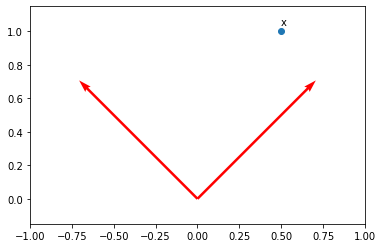

In [34]:
origin = np.array([0, 0])
plt.quiver(
    origin[0],
    origin[1],
    u0[0],
    u0[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="r",
)
plt.quiver(
    origin[0],
    origin[1],
    u1[0],
    u1[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="r",
)

x = np.array([0.5, 1])
x = np.reshape(x, (2, 1))
plt.scatter(x[0], x[1])
plt.axis("equal")
plt.axis([-1, 1, 0, 1])
plt.text(x[0], x[1]+0.04, "x")

In [35]:
U = np.concatenate((u0, u1), axis=1)
U, x

(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([[0.5],
        [1. ]]))

In [36]:
# eq 7.3, page 185 Zaki
a = U.T @ x
x, a, U @ a

(array([[0.5],
        [1. ]]),
 array([[1.06066017],
        [0.35355339]]),
 array([[0.5],
        [1. ]]))

(-1.0, 1.0, 0.0, 1.0)

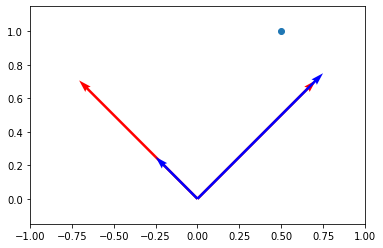

In [37]:
origin = np.array([0, 0])
plt.quiver(
    origin[0],
    origin[1],
    u0[0],
    u0[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="r",
)
plt.quiver(
    origin[0],
    origin[1],
    u1[0],
    u1[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="r",
)
a0u0 = a[0] * u0
a1u1 = a[1] * u1
plt.quiver(
    origin[0],
    origin[1],
    a0u0[0],
    a0u0[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="b",
)
plt.quiver(
    origin[0],
    origin[1],
    a1u1[0],
    a1u1[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="b",
)

plt.scatter(x[0], x[1])
plt.axis("equal")
plt.axis([-1, 1, 0, 1])

In [38]:
U, x, a

(array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([[0.5],
        [1. ]]),
 array([[1.06066017],
        [0.35355339]]))

In [39]:
u0 * a[0] + u1 * a[1], U @ a

(array([[0.5],
        [1. ]]),
 array([[0.5],
        [1. ]]))

In [40]:
# Eq 7.5
r = 1
Ur = U[:,0:r]
ar = a[:r]
x_prime = Ur@ar
x_prime

array([[0.75],
       [0.75]])

In [41]:
a[0]*u0, U[:,0:1]@a[:1], u0 @ a[:1], u0 @ a[0]

(array([[0.75],
        [0.75]]),
 array([[0.75],
        [0.75]]),
 array([[0.75],
        [0.75]]),
 array([0.75, 0.75]))

In [45]:
# x_prime is the projection of x onto the first r basis vectors
x_projected = Ur@ar
x_projected

array([[0.75],
       [0.75]])

(-1.0, 1.0, 0.0, 1.0)

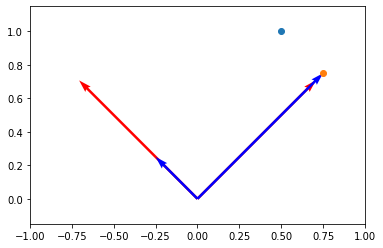

In [46]:
origin = np.array([0, 0])
plt.quiver(
    origin[0],
    origin[1],
    u0[0],
    u0[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="r",
)
plt.quiver(
    origin[0],
    origin[1],
    u1[0],
    u1[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="r",
)
a0u0 = a[0] * u0
a1u1 = a[1] * u1
plt.quiver(
    origin[0],
    origin[1],
    a0u0[0],
    a0u0[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="b",
)
plt.quiver(
    origin[0],
    origin[1],
    a1u1[0],
    a1u1[1],
    scale=1,
    scale_units="xy",
    angles="xy",
    color="b",
)

plt.scatter(x[0], x[1])
plt.scatter(x_projected[0], x_projected[1])
plt.axis("equal")
plt.axis([-1, 1, 0, 1])

Page 189 of Zaki

We also assume that the data matrix D has been
centered by subtracting the mean $\mu$

$X \equiv D$

$ mean\_X \equiv \mu$

$ Z \equiv X\_centered \equiv \bar{D}$

Algorithm 7.1, page 199 of Zaki book, Slide 16 of Chap 7

In [47]:
X = np.array([[2, 3], [3, 2], [4, 6], [5, 4], [6, 7]])

# Step 1
mean_X = np.mean(X, axis=0)

# Step 2
Z = X - mean_X
print(Z.shape)

# Step 3
Sigma = 1 / X.shape[0] * Z.T @ Z
Sigma

(5, 2)


array([[2.  , 2.  ],
       [2.  , 3.44]])

$ \Sigma \approx Cov$

In [48]:
# covariance, function needs samples as columns

# cov_mat = np.cov(Z.T)
# cov_mat

In [49]:
# Sigma = np.zeros((2,2))
# for i in range(X.shape[0]):
#     xi = Z[i]
#     Sigma += xi.reshape(2,1)*xi
# Sigma /= (X.shape[0])
# Sigma

In [50]:
# Step 4, 5
lambdas, U = np.linalg.eigh(Sigma)
lambdas, U

(array([0.59434716, 4.84565284]),
 array([[-0.81814408,  0.57501327],
        [ 0.57501327,  0.81814408]]))

In [51]:
# eigen_values, eigen_vectors = np.linalg.eigh(Sigma)
# eigen_values, eigen_vectors

In [52]:
lambda0 = lambdas[0]
u0 = U[:, 0:1]
print(u0)
print(Sigma @ u0)
print(lambda0 * u0)

[[-0.81814408]
 [ 0.57501327]]
[[-0.48626161]
 [ 0.34175751]]
[[-0.48626161]
 [ 0.34175751]]


In [53]:
U @ np.diag(lambdas) @ np.linalg.inv(U)

array([[2.  , 2.  ],
       [2.  , 3.44]])

In [54]:
# Steps 4, continue ... (Sorting)
sorted_index = np.argsort(lambdas)[::-1]
lambdas = lambdas[sorted_index]
U = U[:, sorted_index]
lambdas, U

(array([4.84565284, 0.59434716]),
 array([[ 0.57501327, -0.81814408],
        [ 0.81814408,  0.57501327]]))

Steps 6 & 7 is omitted

In [24]:
num_components = 1
# Step 8
Ur = U[:, 0:num_components]
Ur

array([[0.57501327],
       [0.81814408]])

- Step 9: X_projected = A

There is mistake in the Algorithm in slides, x should be replaced with $\bar{x}$

In [55]:
X_projected = Z @ Ur
X_projected

array([[-2.40416306],
       [-2.40416306],
       [ 1.13137085],
       [ 0.42426407],
       [ 3.25269119]])

In [56]:
X_reconstructed = X_projected @ Ur.T + mean_X
X_reconstructed

array([[2.3, 2.7],
       [2.3, 2.7],
       [4.8, 5.2],
       [4.3, 4.7],
       [6.3, 6.7]])

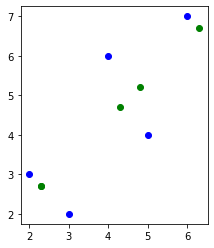

In [57]:
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c="blue")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c="green")
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.draw()

In [58]:
def PCA(X, num_components):
    # num_components = r
    # Step-1
    mean_X = np.mean(X, axis=0)
    Z = X - mean_X

    # Step-2
    # covariance, function needs samples as columns
    cov_mat = np.cov(Z.T)

    # Step-3
    lambdas, U = np.linalg.eigh(cov_mat)

    # Step-4
    sorted_index = np.argsort(lambdas)[::-1]
    # sorted_eigenvalues = eigen_values[sorted_index]
    U = U[:, sorted_index]

    # Step-8
    Ur = U[:, 0:num_components]

    # Step-9, A
    X_projected = Z @ Ur

    X_reconstructed = X_projected @ Ur.T + mean_X

    return X_projected, X_reconstructed

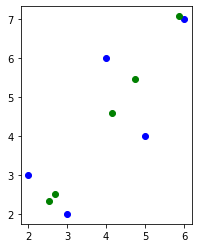

In [59]:
# Applying it to PCA function
X_projected, X_reconstructed = PCA(X, 1)

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c="blue")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c="green")
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.draw()

In [70]:
w0, w1 = 2, 1
N = 10

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)*10

epsilon = np.random.randn(N, 1)
y = w0 + w1 * x + epsilon
X = np.hstack([x, y])
X.shape

(10, 2)

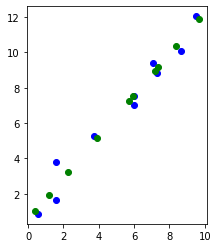

In [71]:
X_projected, X_reconstructed = PCA(X, 1)

fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c="blue")
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c="green")
ax = plt.gca()
ax.set_aspect("equal", adjustable="box")
plt.draw()